In [2]:
using PyPlot, Distributions

In [1]:
f=figure()
function free_sum_random_variables(r1=rand,r2=rand;t=1000,nn=40,bins=40)
    er=Float64[]
    ec=Float64[]
    ef=Float64[]
    for n=[ Int(round(nn/4))  Int(round(nn/2))  nn]
    for i=1:t
        a=diagm(Float64[r1() for i=1:n])
        b=diagm(Float64[r2() for i=1:n])
        
        Q=qrfact(randn(n,n))[:Q]                # real
        M1=Symmetric(a+full(Q)'*b*Q)
            
        U=qrfact(randn(n,n)+im*randn(n,n))[:Q]  # complex
        M2=(a+full(U)'*b*U)
        M2=Hermitian( (M2+M2')/2)
            
        F=fft(eye(n),1)/sqrt(n)  # FFT matrix
            M3=(a+full(F)'*b*F)
        M3=Hermitian( (M3+M3')/2)
        
        append!(er,eigvals(M1))
        append!(ec,eigvals(M2))
            append!(ef,eigvals(M3))
       
    end
        plt[:hist](er,normed=t,bins=200,histtype = "step",bins=bins,color="b")
        plt[:hist](ec,normed=t,bins=200,histtype = "step",bins=bins,color="g")
        plt[:hist](ef,normed=t,bins=200,histtype = "step",bins=bins,color="m")
    end
     
end

function classical_sum_random_variables(r1=rand,r2=rand;t=1000,nn=40,bins=500)
    k=max(t*nn,500000)
    a0=[r1() for i=1:k]
    b0=[r2() for i=1:k]
    plt[:hist](a0+b0,normed=t,bins=200,histtype = "step",bins=bins,color="r")
end

LoadError: LoadError: UndefVarError: figure not defined
while loading In[1], in expression starting on line 1

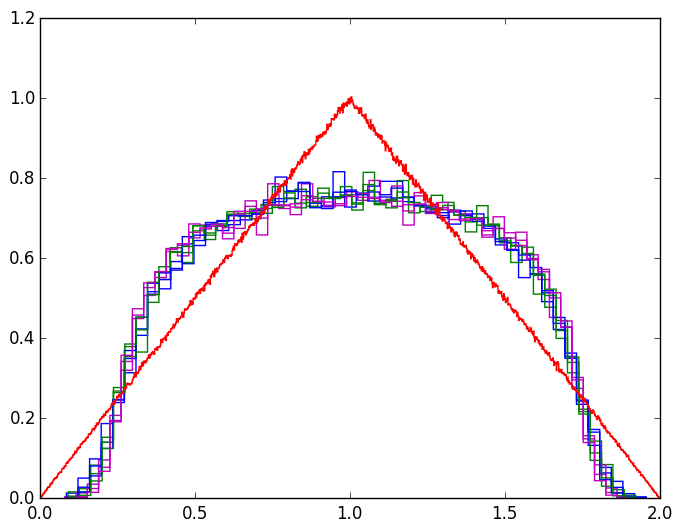

In [326]:
free_sum_random_variables(rand,rand;t=2000,nn=40,bins=50);
classical_sum_random_variables(rand,rand;t=100000,nn=100,bins=1000);

In [147]:
similar([0.0,0.0])

2-element Array{Float64,1}:
 66.0         
  2.22313e-314

In [122]:
Float64[3 for i=1:2]

2-element Array{Float64,1}:
 3.0
 3.0

In [54]:
n=4
Q=qrfact(randn(n,n))[:Q]

4x4 Base.LinAlg.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.345043  -0.458575    0.788742  -0.220318
 -0.10169   -0.662055   -0.23242    0.705211
 -0.395593   0.592689    0.342559   0.612274
  0.845051   0.0105447   0.454445   0.281528

In [55]:
v=diagm(randn(4))

4x4 Array{Float64,2}:
 -0.82334  0.0       0.0       0.0    
  0.0      0.929244  0.0       0.0    
  0.0      0.0       0.121061  0.0    
  0.0      0.0       0.0       1.89243

In [61]:
(v'*Q)'*Q

4x4 Array{Float64,2}:
  1.28193    -0.0792361   0.956375    0.291667
 -0.0792361   0.276899    0.474435   -0.467488
  0.956375    0.474435   -0.0569848   0.258273
  0.291667   -0.467488    0.258273    0.617542

In [62]:
a=diagm(1:4)

4x4 Array{Int64,2}:
 1  0  0  0
 0  2  0  0
 0  0  3  0
 0  0  0  4

In [63]:
a

4x4 Array{Int64,2}:
 1  0  0  0
 0  2  0  0
 0  0  3  0
 0  0  0  4

In [65]:
typeof(a)

Array{Int64,2}

In [66]:
Diagonal(a)

4x4 Diagonal{Int64}:
 1  0  0  0
 0  2  0  0
 0  0  3  0
 0  0  0  4

In [67]:
a=diagm(1:4)

4x4 Array{Int64,2}:
 1  0  0  0
 0  2  0  0
 0  0  3  0
 0  0  0  4

In [68]:
typeof(a)

Array{Int64,2}

In [69]:
typeof(Diagonal(a))

Diagonal{Int64}

In [70]:
randn(4,4) * Diagonal(a)

4x4 Array{Float64,2}:
 -1.30913    0.660044  -4.93568   -0.435159
  1.52777   -3.48117    2.47573    0.531258
  0.612403  -2.19018    1.73469   -1.271   
  0.407391   3.24602    0.544842   2.98225 

In [71]:
M=Diagonal(a)

4x4 Diagonal{Int64}:
 1  0  0  0
 0  2  0  0
 0  0  3  0
 0  0  0  4

In [72]:
S=Symmetric(a)

4x4 Symmetric{Int64,Array{Int64,2}}:
 1  0  0  0
 0  2  0  0
 0  0  3  0
 0  0  0  4

In [73]:
a

4x4 Array{Int64,2}:
 1  0  0  0
 0  2  0  0
 0  0  3  0
 0  0  0  4

In [74]:
full(a)

4x4 Array{Int64,2}:
 1  0  0  0
 0  2  0  0
 0  0  3  0
 0  0  0  4

In [75]:
S+M

4x4 Array{Int64,2}:
 2  0  0  0
 0  4  0  0
 0  0  6  0
 0  0  0  8

In [84]:
M=Symmetric(a)

4x4 Symmetric{Int64,Array{Int64,2}}:
 1  0  0  0
 0  2  0  0
 0  0  3  0
 0  0  0  4

In [85]:
M+M

4x4 Array{Int64,2}:
 2  0  0  0
 0  4  0  0
 0  0  6  0
 0  0  0  8

In [99]:
Diagonal(diagm([rand() for i=1:3]))

3x3 Diagonal{Float64}:
 0.75501  0.0       0.0     
 0.0      0.752938  0.0     
 0.0      0.0       0.948692

In [2]:
using PyPlot

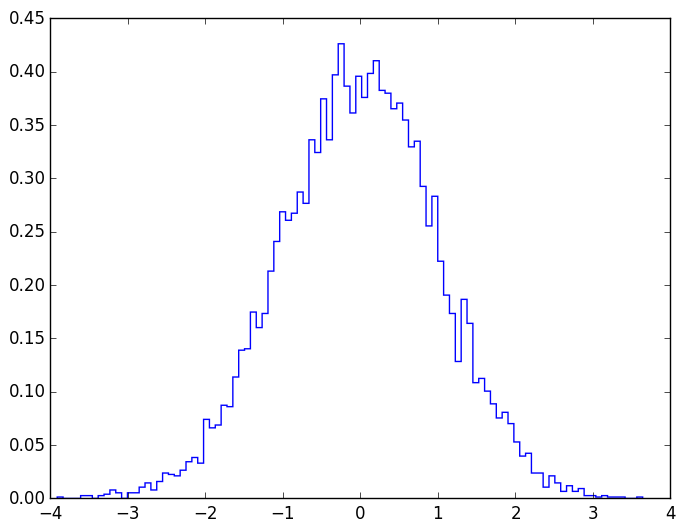

([0.00132376,0.0,0.0,0.0,0.00264752,0.00264752,0.0,0.00264752,0.00397127,0.00794255  …  0.00264752,0.00264752,0.00132376,0.00264752,0.00132376,0.00132376,0.00132376,0.0,0.0,0.00132376],[-3.91192,-3.83638,-3.76083,-3.68529,-3.60975,-3.53421,-3.45866,-3.38312,-3.30758,-3.23204  …  2.96245,3.03799,3.11353,3.18908,3.26462,3.34016,3.4157,3.49125,3.56679,3.64233],Any[PyObject <matplotlib.patches.Polygon object at 0x322db60f0>])

In [11]:
a,b,c=plt[:hist](randn(10000),normed=true,histtype="step",bins=100)

In [12]:
a


100-element Array{Float64,1}:
 0.00132376
 0.0       
 0.0       
 0.0       
 0.00264752
 0.00264752
 0.0       
 0.00264752
 0.00397127
 0.00794255
 0.00529503
 0.0       
 0.00529503
 ⋮         
 0.00661879
 0.00926631
 0.00264752
 0.00264752
 0.00132376
 0.00264752
 0.00132376
 0.00132376
 0.00132376
 0.0       
 0.0       
 0.00132376

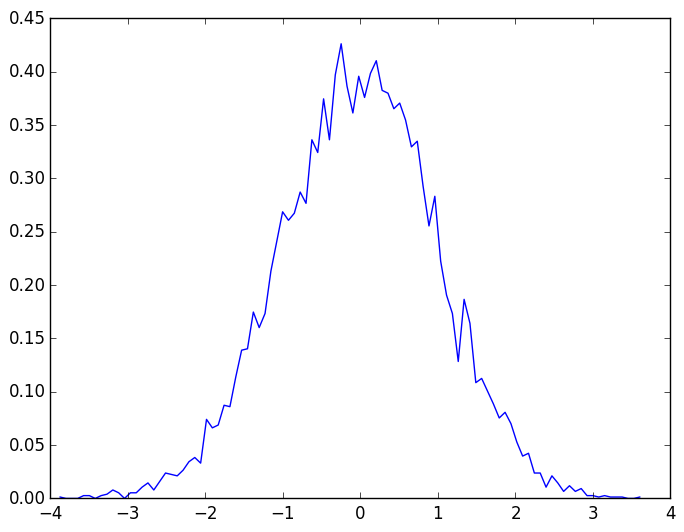

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x323168390>

In [15]:
plot( (b[1:end-1]+b[2:end])/2,a)

In [14]:
c

1-element Array{Any,1}:
 PyObject <matplotlib.patches.Polygon object at 0x322db60f0>